In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sys
import os

# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
s_df = pd.read_csv(os.path.join(datadir, 's_feature_selection/rfecv/station_feature_importance.csv'))
p_df = pd.read_csv(os.path.join(datadir, 'p_feature_selection/rfecv/station_feature_importance.csv'))


In [3]:
s_df.head()

,Feature,B206,B207,FLWY,LKWY,YDD,YFT,YHB,YHH,YHL,YMC,YML,YMR,YNM,YNR,YPP,YTP,YUF,alt_feat_names
0,amp_ratio_1,1,5,5,1,2,2,0,2,0,3,1,1,2,1,1,0,1,ratio 1
1,amp_ratio_2,2,2,4,0,2,1,0,2,0,3,2,2,2,0,1,0,3,ratio 2
2,amp_ratio_3,0,3,2,0,1,0,0,1,1,3,1,0,2,0,1,0,2,ratio 3
3,amp_ratio_4,1,2,2,0,0,1,0,3,0,3,1,1,4,3,2,0,2,ratio 4
4,amp_1,6,1,10,7,10,9,10,10,10,10,6,10,5,10,10,10,8,amp. 1


In [4]:
s_cnts = s_df.drop(['Feature', 'alt_feat_names'], axis=1)
p_cnts = p_df.drop(['Feature', 'alt_feat_names'], axis=1)

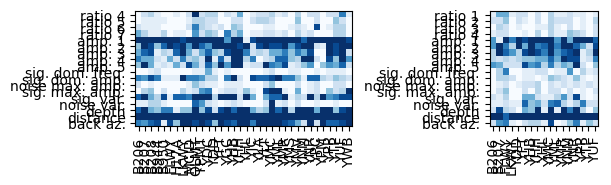

In [5]:
fig, ax = plt.subplots(1, 2, 
                       figsize=(6, 4), 
                       constrained_layout=True,
                       width_ratios=[2, 1])

im1 = plotting.plot_rfecv_feature_heatmap(p_cnts, 
                                    p_df['alt_feat_names'],
                                    ax=ax[0],
                                    plot_colorbar=False)

im2 = plotting.plot_rfecv_feature_heatmap(s_cnts, 
                                    s_df['alt_feat_names'],
                                    ax=ax[1],
                                    plot_colorbar=False)

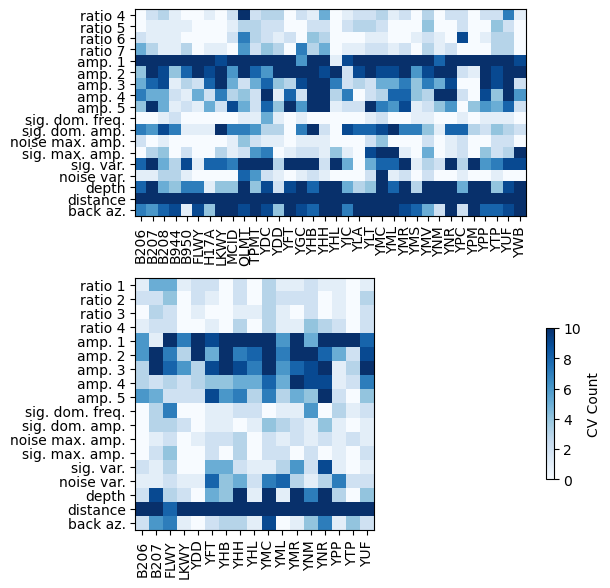

In [6]:
fig, axes = plt.subplots(2, 1, 
                       figsize=(6, 6), 
                       constrained_layout=True)
im1 = plotting.plot_rfecv_feature_heatmap(p_cnts, 
                                    p_df['alt_feat_names'],
                                    ax=axes[0],
                                    plot_colorbar=False)

im2 = plotting.plot_rfecv_feature_heatmap(s_cnts, 
                                    s_df['alt_feat_names'],
                                    ax=axes[1],
                                    plot_colorbar=True)
for ax in axes:
    ax.set_anchor('W')


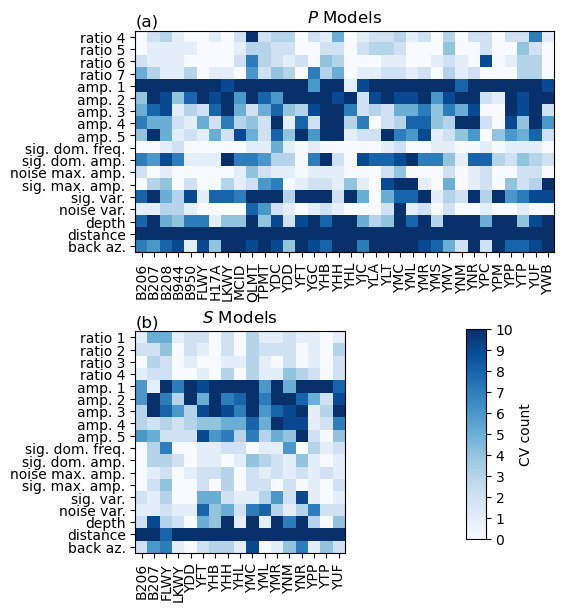

In [34]:
fig, axes = plt.subplot_mosaic([['upper', 'upper'], 
                                 ['lower left', 'lower right']], 
                                figsize=(6, 6), 
                                constrained_layout=True,
                                width_ratios=[1, 0.05])
im1 = plotting.plot_rfecv_feature_heatmap(p_cnts, 
                                    p_df['alt_feat_names'],
                                    ax=axes['upper'],
                                    plot_colorbar=False,
                                    title=f'$\it P$ Models')
im2 = plotting.plot_rfecv_feature_heatmap(s_cnts, 
                                    s_df['alt_feat_names'],
                                    ax=axes['lower left'],
                                    plot_colorbar=False,
                                    title=f'$\it S$ Models')
axes['upper'].set_anchor('W')
axes['lower left'].set_anchor('W')
axes['upper'].text(0, 1.02, '(a)',
            transform=axes['upper'].transAxes,
            fontsize=12)
axes['lower left'].text(0, 
                1.02, 
                '(b)', 
                transform=axes['lower left'].transAxes,
                fontsize=12)

cb_pos = axes['lower right'].get_position()
cb_pos.x0 = cb_pos.x0 - 0.1
cb_pos.x1 = cb_pos.x1 - 0.1
axes['lower right'].set_position(cb_pos)
plt.colorbar(im2, cax=axes['lower right'], label=f'CV count', ticks=np.arange(0, 11))


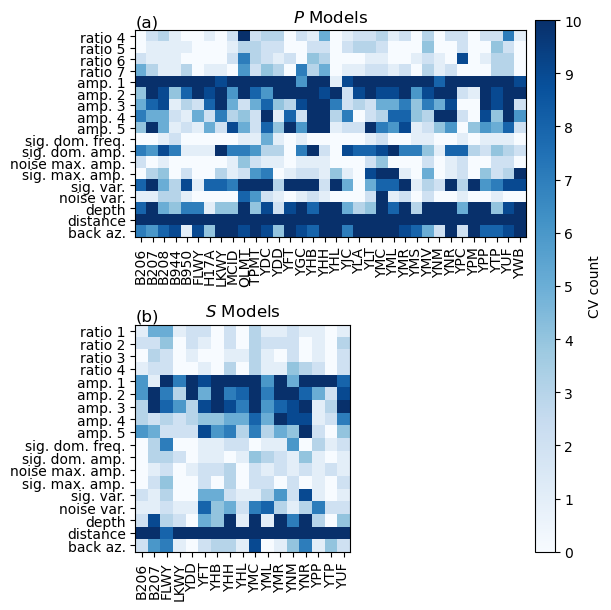

In [36]:
fig, axes = plt.subplot_mosaic([['upper left', 'right'], 
                                 ['lower left', 'right']], 
                                figsize=(6, 6), 
                                constrained_layout=True,
                                width_ratios=[1, 0.05])
im1 = plotting.plot_rfecv_feature_heatmap(p_cnts, 
                                    p_df['alt_feat_names'],
                                    ax=axes['upper left'],
                                    plot_colorbar=False,
                                    title=f'$\it P$ Models')
im2 = plotting.plot_rfecv_feature_heatmap(s_cnts, 
                                    s_df['alt_feat_names'],
                                    ax=axes['lower left'],
                                    plot_colorbar=False,
                                    title=f'$\it S$ Models')
axes['upper left'].set_anchor('W')
axes['lower left'].set_anchor('W')
axes['upper left'].text(0, 1.02, '(a)',
            transform=axes['upper left'].transAxes,
            fontsize=12)
axes['lower left'].text(0, 
                1.02, 
                '(b)', 
                transform=axes['lower left'].transAxes,
                fontsize=12)
plt.colorbar(im2, cax=axes['right'], label=f'CV count', ticks=np.arange(0, 11))
